# SCC0252 - Visualização Computacional, Projeto Prático - Etapa 2
## Membros

- Giovanni Shibaki Camargo - 11796444
- Lucas Keiti Anbo Mihara  - 11796472

**Para a etapa 2 do projeto, estamos utilizando o mesmo processamento, tratamento e descrições feitas na primeira etapa, adicionando as visualizações interativas e multidimensionais solicitadas para a segunda etapa.**

**Boa parte das visualizações geradas pra a primeira etapa do projeto já apresentavam certa interatividade para com o usuário, como por exemplo as informações exibidas ao passar o mouse por cima das barras verticais ou horizontais das visualizações. Desta forma, mantemos essas visualizações.**

## Conjunto de dados escolhido

Para este trabalho, escolhemos o **Database de filmes do IMDB** de forma a explorar algumas de seus características e obter visualizações uteis quanto à medias anuais de lucro, tempo de filme, gêneros mais assistidos, diretores mais famosos e lucros de seus filmes, etc.

A análise de dados e visualização de filmes do IMDB pode oferecer uma ampla variedade de aplicações em diversas áreas, incluindo a industria cinematográfica, pesquisa de mercado, recomendação de filmes, entreterimento, etc. Abaixo estão algumas das principais aplicações:

- **Análise de desempenho de filmes**
  - É possível analisar o desempenho de filmes com base em informações como classificação no IMDB, número de votos, lucro e gênero. Isso pode ajudar a entender quais filmes têm sido mais populares e rentáveis ao longo do tempo.

- **Análise de tendências**
  - Os dados do IMDB podem ser uteis para identificar tendências na indústria cinematográfica, como gêneros populares, diretores de destaque, e mudanças nas preferências do público quanto ao gênero e duração de cada filme.

- **Avaliação de Investimentos em Filmes**
  - Estúdios e Investidores podem usarr análise de dados e visualizações para avaliar o retorno sobre o investimento em filmes, considerando os custos de produção, duração do filme, publicidade e receitas de bilheteria.



## Introdução ao conjunto de dados

O Database de filmes do IMDB possui registros de filmes desde os anos 40 até a atualidade, possuindo 1000 filmes no total, com 16 carasterísticas (colunas):
- Poster_Link
  - URL para o poster promocional do filme
- Series_Title
  - Título do filme
- Released_Year
  - Data de lançamento
- Certificate
  - Faixa etária do filme
    - Relativo à cada país em que foi produzido / lançado
- Runtime
  - Duração do filme em minutos
- Genre
  - Lista de gêneros do filme
- IMDB_Rating
  - Nota registrada no IMDB
- Overview
  - Sinópsia do filme
- Meta_score
- Director
  - Diretor do filme
- Star [1-4]
  - Lista dos 4 atores principais do filme
- No_of_Votes
  - Número de votos registrados no IMDB
- Gross
  - Lucro total do filme

### Importando as bibliotecas necessárias

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
sns.set_style('darkgrid')

import locale
locale.setlocale(locale.LC_ALL, '')

'Portuguese_Brazil.1252'

## Leitura e tratamento da base de dados

In [2]:
# Ler o arquivo CSV para um pandas Dataframe
df = pd.read_csv('https://github.com/giovanni-shibaki/SCC0252_Projeto_Pratico/raw/main/imdb_top_1000.xls', delimiter=',', thousands=',')

In [3]:
# Mostrando os 5 primeiros registros do Dataframe
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


Eliminar as colunas que não são relevantes para qualquer visualização escolhida.

In [4]:
df = df.drop(columns=['Poster_Link', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4'])

Ao verificar-se os valores unicos da coluna "Released_Year", notamos que há um valor não numérico. Dessa forma, iremos eliminar todas as linhas que contém este valor.

In [5]:
df.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [6]:
df.loc[df.Released_Year == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,269197,173837933.0


In [7]:
# Eliminando o registro escolhido
df.drop(df.loc[df.Released_Year == 'PG'].index, inplace=True)

In [8]:
df.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

Convertendo o tipo de dado da coluna Released_Year para inteiro.

In [9]:
df.Released_Year = df.Released_Year.astype(int)

A coluna Runtime apresenta a descrição "min" após o valor numérico, sendo assim tratado como string. Iremos então, remover a descrição e converter o tipo de dado para inteiro.

In [10]:
df['Runtime'] = df['Runtime'].str.extract(r'([0-9]*)').astype(int)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1.991217e+03,2.329702e+01,1920.0,1976.0,1999.0,2009.00,2020.0
Runtime,999.0,1.228739e+02,2.810252e+01,45.0,103.0,119.0,137.00,321.0
IMDB_Rating,999.0,7.949650e+00,2.754071e-01,7.6,7.7,7.9,8.10,9.3
Meta_score,842.0,7.797268e+01,1.238341e+01,28.0,70.0,79.0,87.00,100.0
No_of_Votes,999.0,2.736974e+05,3.275366e+05,25088.0,55471.5,138356.0,374477.50,2343110.0
Gross,830.0,6.790728e+07,1.097546e+08,1305.0,3245338.5,23457439.5,80103240.75,936662225.0


As colunas **Meta_score** e **Gross** serão utilizadas nas visualizações, porém contém valores nulos. Dessa forma, em cada visualização iremos desconsiderar as linhas que possuem valores nulos nessas colunas.

In [12]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
No_of_Votes        0
Gross            169
dtype: int64

In [13]:
df.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
No_of_Votes        int64
Gross            float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   No_of_Votes    999 non-null    int64  
 9   Gross          830 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 78.0+ KB


Cada linha da coluna **Genre** pode possuir 1 ou mais genêros, que são listados um após o outro separados por virgulas. Dessa forma, iremos criar novas colunas para cada gênero possível.

In [15]:
df_genre = df['Genre'].str.get_dummies(sep = ', ')
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross'],
      dtype='object')

In [17]:
df = df.join(df_genre)
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

Filmes com mais de uma categoria de gênero terá valores 1 em duas ou mais colunas de gênero.

In [18]:
df[["Genre", "Action", "Adventure", "Drama", "Horror", "Crime"]]

,Genre,Action,Adventure,Drama,Horror,Crime
0,Drama,0,0,1,0,0
1,"Crime, Drama",0,0,1,0,1
2,"Action, Crime, Drama",1,0,1,0,1
3,"Crime, Drama",0,0,1,0,1
4,"Crime, Drama",0,0,1,0,1
...,...,...,...,...,...,...
995,"Comedy, Drama, Romance",0,0,1,0,0
996,"Drama, Western",0,0,1,0,0
997,"Drama, Romance, War",0,0,1,0,0
998,"Drama, War",0,0,1,0,0


Agora, temos uma coluna para cada gênero de filme.

Notamos também, que o dataset escolhido possui apenas 6 filmes lançados em 2020, número que não é relante para visualização, considerando que faremos algumas visualizações agrupadas por década dos filmes lançados.

In [19]:
line_counts_by_year = df.groupby('Released_Year').size().reset_index(name='line_count')
print(line_counts_by_year[10:])

    Released_Year  line_count
10           1932           2
11           1933           3
12           1934           2
13           1935           3
14           1936           1
..            ...         ...
94           2016          28
95           2017          22
96           2018          19
97           2019          23
98           2020           6

[89 rows x 2 columns]


Dessa forma, estamos excluindo filmes do ano 2020 do dataframe

In [20]:
df = df[df['Released_Year'] != 2020]

## Visualização de dados

Primeiramente, iremos verificar as correlações entre os diferentes atributos do dataframe, excluindo as colunas inseridas para gênero do filme.

Escolhemos a visualização por meio de um heatmap divergente pois destaca as duplas de atributos com maior correlação, independentemente se positiva ou negativa.

In [21]:
palette = sns.diverging_palette(5, 5, s=100, l=30, as_cmap=True)

C:\Users\giova\AppData\Local\Temp\ipykernel_24152\1172987371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:, 0:9].corr(), cmap=palette, vmin=-0.7, vmax=0.7, annot=True, linewidths=0.5, fmt= '.2f', ax=ax).set(title='Correlation matrix')


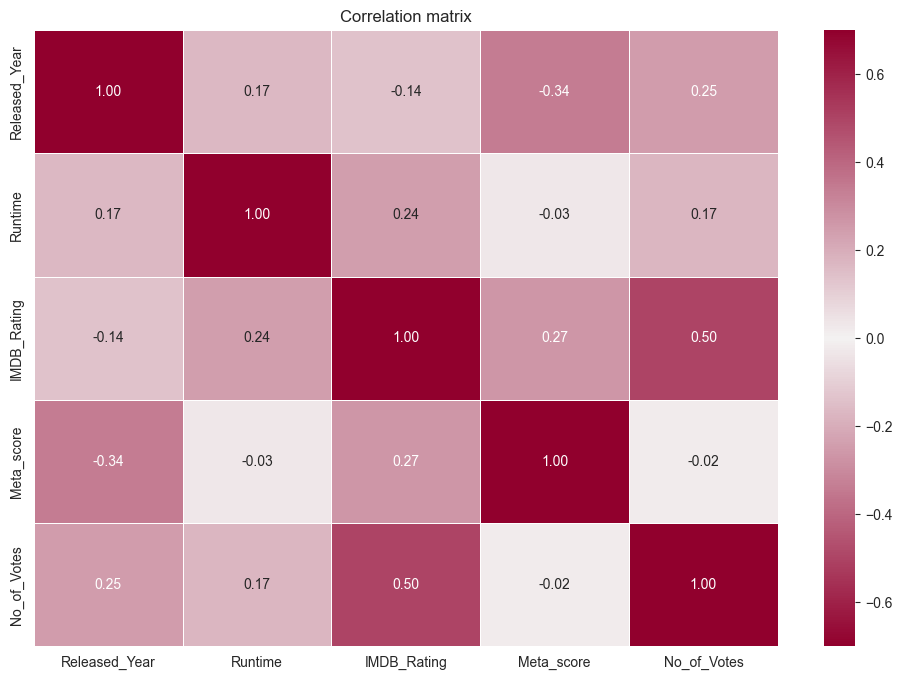

In [22]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.iloc[:, 0:9].corr(), cmap=palette, vmin=-0.7, vmax=0.7, annot=True, linewidths=0.5, fmt= '.2f', ax=ax).set(title='Correlation matrix')
plt.show()

Através da matriz de correlações acima, podemos verificar que as correlações com valores relevantes estão entre as colunas:
- **Meta_score** e **Released_Year**
- **IMDB_Rating** e **No_of_Votes**
- **Gross** e **No_of_Votes**

Dessa forma, iremos gerar algumas visualizações relacionadas aos pares de colunas com correlação relevante.

In [23]:
test = ex.scatter(df, x='Released_Year', y='Meta_score', hover_data=['Series_Title'], title='Meta score by released year')
test.show()

Aqui podemos ver que até 1960 as notas dos filmes estavam concentradas em notas maiores e depois disso, com o lançamento de mais filmes por ano, há uma maior distribuição de notas

In [24]:
test = ex.scatter(df, x='No_of_Votes', y='IMDB_Rating', hover_data=['Series_Title', 'Released_Year'], title='IMDB Rating by Number of votes')
test.show()

Aqui, podemos ver que existe uma certa correlação entre o número de votos no filme e sua avaliação no IMDB.

In [25]:
test = ex.scatter(df, x='No_of_Votes', y='Gross', hover_data=['Series_Title', 'Released_Year', 'Genre'], title='Gross revenue by Number of votes')
test.show()

Aqui, há uma maior concentração de filmes com poucos votos e uma pequena correlação entre o número de votos e o lucro de cada filme.

### Média do Tempo de duração por ano e década

Queremos visualizar se a média do tempo de duração dos filmes mudou com o passar dos anos, já que acreditamos que grande parte dos fimes atuais possui 2 horas ou mais de duração.

In [26]:
line_counts_by_year = df.groupby('Released_Year').size().reset_index(name='line_count')
print(line_counts_by_year[10:])

    Released_Year  line_count
10           1932           2
11           1933           3
12           1934           2
13           1935           3
14           1936           1
..            ...         ...
93           2015          25
94           2016          28
95           2017          22
96           2018          19
97           2019          23

[88 rows x 2 columns]


In [27]:
# Agrupando os valores por ano e calculando a média do Runtime dos filmes de cada ano
mean_values = df.groupby('Released_Year')['Runtime'].mean().reset_index()

# Gráfico de linha para a média do tempo de duração de filmes por ano
fig = ex.line(mean_values, x='Released_Year', y='Runtime', title='Mean value of runtime by year')
fig.show()

Para melhor visualizar essa mudança no tempo médio de duração dos filmes, vamos visualizar a média por década.

In [28]:
df2 = df.copy()
df2['decade'] = df2['Released_Year'] // 10 * 10  # Coluna década contem a década correspondente do ano de lançamento do filme

# Agrupar os filmes por ano e calcular a média do tempo de duração dos filmes por década
mean_runtime_by_decade = df2.groupby('decade')['Runtime'].mean().reset_index()

# Gráfico de linha para a média do tempo de duração de filmes por década
fig = ex.line(mean_runtime_by_decade, x='decade', y='Runtime', title='Mean Runtime by Decade') # TODO: Arrumar o título
fig.update_xaxes(type='category')
fig.show()

Com esses dois gráficos, podemos ver uma tendencia de aumento da duração dos filmes até a década de 1960 e a partir daí esse tempo se estabilizou

### Média do Lucro por ano e por década

In [29]:
# Agrupar os filmes por ano e calcular a média do lucro filmes por ano
mean_values = df.groupby('Released_Year')['Gross'].mean().reset_index()

# Gráfico de linha para a média do lucro por ano
fig = ex.line(mean_values, x='Released_Year', y='Gross', title='Mean value of Gross revenue by Year')
fig.show()

Para melhor visualizar essa mudança no lucro médio dos filmes, vamos visualizar a média por década.

In [30]:
df2['decade'] = df2['Released_Year'] // 10 * 10  # Coluna década contem a década correspondente do ano de lançamento do filme

# Agrupar os filmes por ano e calcular a média dos lucros por década
mean_runtime_by_decade = df2.groupby('decade')['Gross'].mean().reset_index()

# Gráfico de linha para a média dos lucros por década
fig = ex.line(mean_runtime_by_decade, x='decade', y='Gross', title='Mean Gross revenue by Decade')
fig.update_xaxes(type='category')
fig.show()

Podemos ver uma tendencia de aumento no lucro médio de cada filme com o passar das décadas, note que não está sendo levada em consideração a inflação.

### Total de filmes por categoria por ano

Queremos agora visualizar como foi a mudança na distribuição dos gêneros de filme com o passar dos anos. Vamos dessa forma, mostrar os top 5 gêneros de filmes com maior número de lançamentos em cada década.

In [31]:
# Selecionando as colunas de gênero
columns_to_sum = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Calculando a soma dos valores 1 (True) de cada Gênero de filme
sum_of_columns = df[columns_to_sum].sum()

# Ordenando-os em ordem decrescente
sorted_sum_of_columns = sum_of_columns.sort_values(ascending=False)

# Mostrando a soma de cada gênero
print(sorted_sum_of_columns)

Drama        718
Comedy       230
Crime        209
Adventure    194
Action       189
Thriller     136
Romance      124
Biography    108
Mystery       99
Animation     81
Sci-Fi        67
Fantasy       66
Family        56
History       53
War           51
Music         35
Horror        32
Western       20
Sport         19
Film-Noir     19
Musical       17
dtype: int64


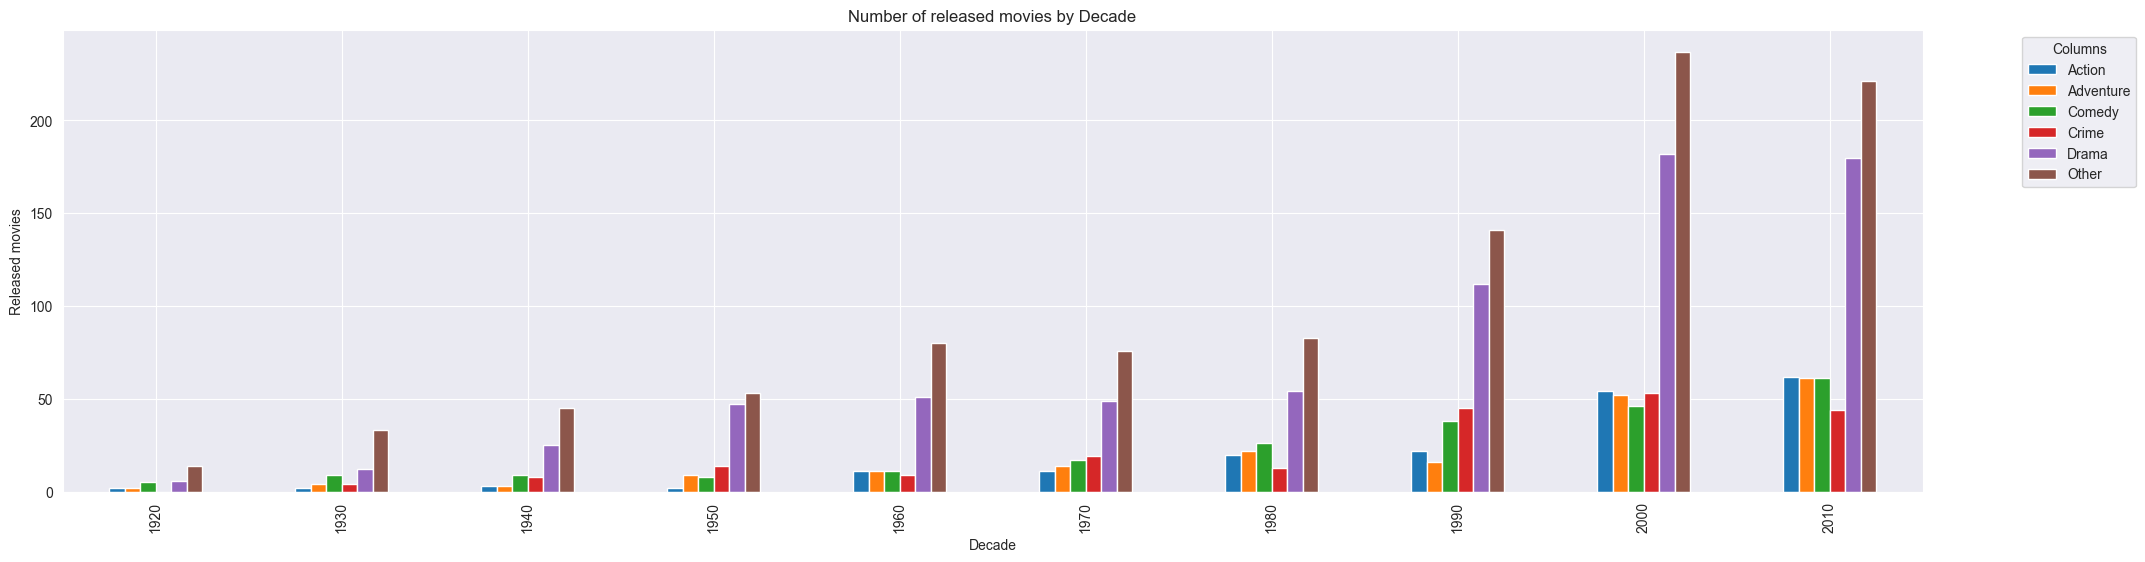

In [32]:
columns_to_sum = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Iremos somar as colunas 'Animation', 'Biography', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western' na categoria 'Other'
df['Other'] = df[['Animation', 'Biography', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']].sum(axis=1)

# Deletar as colunas que foram agrupadas em 'Other'
df3 = df.drop(['Animation', 'Biography', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], axis=1)

# Declarando as colunas que serão plotadas
columns_to_sum = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Other']

# Coluna década contem a década correspondente do ano de lançamento do filme
df3['decade'] = (df3['Released_Year'] // 10) * 10

# Agrupar por década e somar o total de filmes de cada gênero
sum_by_decade = df3.groupby('decade')[columns_to_sum].sum().reset_index()

# TODO: Arrumar título
sum_by_decade.plot(kind='bar', x='decade', figsize=(24, 6))
plt.title('Number of released movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Released movies')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Versão interativa utilizando a biblioteca Dash

Aqui, com o mesmo objetivo de visualizar como foi a mudança na distribuição dos gênero de filme com o passar dos anos, utilizamos a biblioteca Dash para exibir essa distribuição dos gêneros de filme, porém deixando a cargo do usuário a seleção dos gêneros de filmes que deseja visualizar, podendo assim fazer uma comparação do número de filmes lançados por década nos gêneros de sua preferência, ajustando por conta o que é exibido na visualização de maneira interativa e dinâmica.

Além disso, agora é possível passar o mouse sobre as barras, vendo assim uma descrição mais detalhada e precisa dos dados exibidos.

Para acessar o Dashboard em seu navegador, basta acessar a seguinte url:
- http://localhost:8050/

In [33]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [34]:
# Coluna década contem a década correspondente do ano de lançamento do filme
df['decade'] = (df['Released_Year'] // 10) * 10

# Initialize the Dash app
app = dash.Dash(__name__)

# External CSS file
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css', '/assets/custom_styles.css']

# Initialize the Dash app with external stylesheets
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Movie Genre Analysis per Decade Dashboard", className="display-4"),
        html.P("Explore the distribution of movie genres over decades. Select below, the genres that you want to see into the visualization:", className="lead"),
    ], className="jumbotron"),
    
    dcc.Checklist(
        id='genre-checkboxes',
        options=[
            {'label': genre, 'value': genre} for genre in df.columns[10:-1]
        ],
        value=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime']
    ),
    
    dcc.Graph(id='bar-chart'),
], className="container-fluid")  # Apply Bootstrap container-fluid class to the main container

# Callback to update the bar chart based on the selected genres
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('genre-checkboxes', 'value')]
)
def update_chart(selected_genres):
    # Filter the DataFrame based on selected genres
    filtered_df = df[['decade'] + selected_genres]

    # Group by decade and sum the total movies for each selected genre
    sum_by_decade = filtered_df.groupby('decade')[selected_genres].sum().reset_index()

    # Create bar chart using Plotly Express
    fig = px.bar(
        sum_by_decade,
        x='decade',
        y=selected_genres,
        title='Number of Released Movies by Decade',
        labels={'decade': 'Decade', 'value': 'Released Movies', 'variable': 'Genre'},
    )
    fig.update_layout(barmode='group')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Vimos aqui que filmes de Drama foram os que mais aumentaram seu número de lançamento com o passar dos anos, seguido por Aventura e Comédia, gêneros bem comuns no cinema que sempre fazem sucesso.

### Média de lucro, nota no IMDB e número de votos de cada gênero de filme

Outra visualização que achamos interessante, é a média de algumas das características dos filmes de cada gênero, para ver então quais são aqueles que dão mais lucros aos estúdios, e são mais populares, recebendo um número maior de votos no IMDB.

In [35]:
# Colunas de gênero de filmes
binary_columns = df.columns[10:-1]

# Dicionario contendo os valores de todas os gêneros
category_means = {}

# Calcular o valor médio do lucro de cada gênero de filme
for column in binary_columns:
    category_means[column] = df[df[column] == 1]['Gross'].mean()

# Convertendo o dicionário para um Dataframe
category_means_df = pd.DataFrame.from_dict(category_means, orient='index', columns=['Mean Gross'])

# Ordenando
category_means_df = category_means_df.sort_values(by='Mean Gross', ascending=True)

# Barplot horizontal do lucro médio por gênero de filme
fig = ex.bar(
    category_means_df,
    x='Mean Gross',
    y=category_means_df.index,  # Categories on the Y-axis
    orientation='h',  # Horizontal bar plot
    title='Mean Gross revenue by Movie Genre',
    labels={'Mean Gross': 'Mean Gross revenue', 'index': 'Genre'},
)

fig.show()

In [36]:
# Colunas de gênero de filmes
binary_columns = df.columns[10:-1]

# Dicionario contendo os valores de todas os gêneros
category_means = {}

# Calcular o valor médio da nota no IMDB de cada gênero de filme
for column in binary_columns:
    category_means[column] = df[df[column] == 1]['IMDB_Rating'].mean()

# Convertendo o dicionário para um Dataframe
category_means_df = pd.DataFrame.from_dict(category_means, orient='index', columns=['Mean IMDB Rating'])

# Ordenando
category_means_df = category_means_df.sort_values(by='Mean IMDB Rating', ascending=True)

# Barplot horizontal da nota no IMDB por gênero de filme
fig = ex.bar(
    category_means_df,
    x='Mean IMDB Rating',
    y=category_means_df.index,  # Categories on the Y-axis
    orientation='h',  # Horizontal bar plot
    title='Mean IMDB Rating by Movie Genre',
    labels={'Mean IMDB Rating': 'Mean IMDB Rating', 'index': 'Genre'},
)

# Limitando o eixo X entre 7.8 e 8.1
fig.update_xaxes(range=[7.8, 8.1])

fig.show()

---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
File ~\AppData\Roaming\Python\Python311\site-packages\flask\app.py:867, in Flask.full_dispatch_request(self=<Flask '__main__'>)
    865     rv = self.preprocess_request()
    866     if rv is None:
--> 867         rv = self.dispatch_request()
        self = <Flask '__main__'>
        rv = None
    868 except Exception as e:
    869     rv = self.handle_user_exception(e)

File ~\AppData\Roaming\Python\Python311\site-packages\flask\app.py:852, in Flask.dispatch_request(self=<Flask '__main__'>)
    850 # otherwise dispatch to the handler for that endpoint
    851 view_args: dict[str, t.Any] = req.view_args  # type: ignore[assignment]
--> 852 return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
        rule = <Rule '/assets/<filename>' (HEAD, OPTIONS, GET) -> _dash_assets.static>
        view_args = {'filename': 'custom_

In [37]:
# Colunas de gênero de filmes
binary_columns = df.columns[10:-1]

# Dicionario contendo os valores de todas os gêneros
category_means = {}

# Calcular o valor médio do número de votos de cada gênero de filme
for column in binary_columns:
    category_means[column] = df[df[column] == 1]['No_of_Votes'].mean()

# Convertendo o dicionário para um Dataframe
category_means_df = pd.DataFrame.from_dict(category_means, orient='index', columns=['No_of_Votes'])

# Ordenando
category_means_df = category_means_df.sort_values(by='No_of_Votes', ascending=True)

# Barplot horizontal do número de votos por gênero de filme
fig = ex.bar(
    category_means_df,
    x='No_of_Votes',
    y=category_means_df.index,  # Categories on the Y-axis
    orientation='h',  # Horizontal bar plot
    title='Mean Number of Votes by Movie Genre',
    labels={'No_of_Votes': 'Mean Number of Votes', 'index': 'Genre'},
)

# Show the interactive plot.
fig.show()

### Diretores com maior média de lucro e notas no IMDB

As visualizações a seguir estão relacionadas com os diretores responsáveis pela produção de cada filme. Queremos visualizar quais são os diretores com maior média de lucro em seus filmes, e que obtiveram maior nota média de seus filmes no IMDB.

In [38]:
def directors_highest_mean_gross():
    # Calcular a média de lucro de cada diretor
    director_means = df.groupby('Director')['Gross'].mean().reset_index()

    # Encontrar o nome do filme que obteve maior lucro para cada diretor
    director_max_gross_movies = df.groupby('Director').apply(lambda group: group[group['Gross'] == group['Gross'].max()]['Series_Title']).reset_index(name='MaxGrossMovie')

    # Encontrar o valor do lucro do filme que obteve maior lucro para cada diretor
    director_max_gross_movies_g = df.groupby('Director').apply(lambda group: group[group['Gross'] == group['Gross'].max()]['Gross']).reset_index(name='MaxGrossMovieG')

    # Dando merge nos subdataframes
    director_info = pd.merge(director_means, director_max_gross_movies, on='Director')

    # Dando merge nos subdataframes
    director_info2 = pd.merge(director_info, director_max_gross_movies_g, on='Director')

    # Ordenando de forma decrescente
    top_directors_info = director_info2.sort_values(by='Gross', ascending=False).head(10)

    top_directors_info['Text'] = top_directors_info.apply(lambda row: f"Top Movie: {row['MaxGrossMovie']}       <br>Movie Gross: {row['MaxGrossMovieG']}", axis=1)

    return top_directors_info

top_directors_info = directors_highest_mean_gross()

fig = ex.bar(
    top_directors_info,
    x='Gross',
    y='Director',
    orientation='h',  # Horizontal bar plot
    title='Directors with Highest Mean Gross revenue',
    labels={'Gross': 'Mean Gross revenue', 'Director': 'Director'},
    color_discrete_sequence=['darkcyan'],  # Use dark cyan color
    text='Text',  # Use the custom text label
)

fig.show()

Alguns diretores possuem apenas um filme registrado, fazendo com que a média de lucro de seus filmes seja representado por seu único filme presente nesta base de dados. Dessa forma, o gráfico a seguir apresenta apenas os diretores com 5 ou mais filmes registrados no Dataframe.

In [39]:
def directors_5_or_more_movies_and_highest_mean_gross():
    # Calcular a média de lucro de cada diretor
    director_means = df.groupby('Director')['Gross'].mean().reset_index()

    # Contando o total de filmes de cada diretor
    director_movie_counts = df['Director'].value_counts().reset_index()
    director_movie_counts.columns = ['Director', 'MovieCount']

    # Dando merge nos subdataframes
    director_info = pd.merge(director_means, director_movie_counts, on='Director')

    # Filtrar os diretores com 5 filmes ou mais
    top_directors = director_info[director_info['MovieCount'] >= 5]

    # Encontrar o nome do filme que obteve maior lucro para cada diretor
    director_max_gross_movies = df.groupby('Director').apply(lambda group: group[group['Gross'] == group['Gross'].max()]['Series_Title']).reset_index(name='MaxGrossMovie')

    # Encontrar o valor do lucro do filme que obteve maior lucro para cada diretor
    director_max_gross_movies_g = df.groupby('Director').apply(lambda group: group[group['Gross'] == group['Gross'].max()]['Gross']).reset_index(name='MaxGrossMovieG')

    # Dando merge nos subdataframes
    director_info = pd.merge(top_directors, director_max_gross_movies, on='Director')

    # Dando merge nos subdataframes
    director_info2 = pd.merge(director_info, director_max_gross_movies_g, on='Director')

    # Removendo linhas duplicadas causadas pelo merge
    director_info2 = director_info2.drop_duplicates(subset='Director', keep="first")

    # Ordenando de forma decrescente
    top_directors_info = director_info2.sort_values(by='Gross', ascending=False).head(10)

    top_directors_info['Text'] = top_directors_info.apply(lambda row: f"Top Movie: {row['MaxGrossMovie']}       <br>Movie Gross: {row['MaxGrossMovieG']}", axis=1)

    return top_directors_info

top_directors_info = directors_5_or_more_movies_and_highest_mean_gross()

fig = ex.bar(
    top_directors_info,
    x='Gross',
    y='Director',
    orientation='h',  # Horizontal bar plot
    title='Directors with 5 or More Movies and Highest Mean Gross revenue ',
    labels={'Gross': 'Mean Gross revenue', 'Director': 'Director'},
    color_discrete_sequence=['darkcyan'],  # Use dark cyan color
    text='Text',  # Use the custom text label
)

fig.show()

In [40]:
def directors_highest_mean_IMDB_Rating():
    # Calcular a média da nota no IMDB de cada diretor
    director_means = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

    # Encontrar o nome do filme que obteve maior nota no IMDB para cada diretor
    director_max_IMDB_Rating_movies = df.groupby('Director').apply(lambda group: group[group['IMDB_Rating'] == group['IMDB_Rating'].max()]['Series_Title']).reset_index(name='MaxIMDB_RatingMovie')

    # Encontrar o valor da nota do filme que obteve maior nota para cada diretor
    director_max_IMDB_Rating_movies_g = df.groupby('Director').apply(lambda group: group[group['IMDB_Rating'] == group['IMDB_Rating'].max()]['IMDB_Rating']).reset_index(name='MaxIMDB_RatingMovieG')

    # Dando merge nos subdataframes
    director_info = pd.merge(director_means, director_max_IMDB_Rating_movies, on='Director')

    # Dando merge nos subdataframes
    director_info2 = pd.merge(director_info, director_max_IMDB_Rating_movies_g, on='Director')

    # Ordenando de forma decrescente
    top_directors_info = director_info2.sort_values(by='IMDB_Rating', ascending=False).head(10)

    top_directors_info['Text'] = top_directors_info.apply(lambda row: f"Top Movie: {row['MaxIMDB_RatingMovie']}       <br>Movie IMDB Rating: {row['MaxIMDB_RatingMovieG']}", axis=1)
    
    return top_directors_info

top_directors_info = directors_highest_mean_IMDB_Rating()

fig = ex.bar(
    top_directors_info,
    x='IMDB_Rating',
    y='Director',
    orientation='h',  # Horizontal bar plot
    title='Directors with Highest Mean IMDB Rating',
    labels={'IMDB_Rating': 'Mean IMDB Rating', 'Director': 'Director'},
    color_discrete_sequence=['darkcyan'],  # Use dark cyan color
    text='Text',  # Use the custom text label
)

# Limitar o eixo X para exibir apenas os valores entre 8.4 e 9
fig.update_xaxes(range=[8.4, 9])

fig.show()

Alguns diretores possuem apenas um filme registrado, fazendo com que a média de lucro de seus filmes seja representado por seu único filme presente nesta base de dados. Dessa forma, o gráfico a seguir apresenta apenas os diretores com 5 ou mais filmes registrados no Dataframe.

Isso fica mais claro ainda nesta visualização, já que a mudança nos valores médios da nota no IMDB de seus filmes e a disposição do gráfico muda completamente.

In [41]:
def directors_5_or_more_movies_and_highest_mean_IMDB_Rating():
    # Calcular a média da nota no IMDB de cada diretor
    director_means = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

    # Contando o total de filmes de cada diretor
    director_movie_counts = df['Director'].value_counts().reset_index()
    director_movie_counts.columns = ['Director', 'MovieCount']

    # Dando merge nos subdataframes
    director_info = pd.merge(director_means, director_movie_counts, on='Director')

    # Filtrar os diretores com 5 filmes ou mais
    top_directors = director_info[director_info['MovieCount'] >= 5]

    # Encontrar o nome do filme que obteve maior nota no IMDB para cada diretor
    director_max_IMDB_Rating_movies = df.groupby('Director').apply(lambda group: group[group['IMDB_Rating'] == group['IMDB_Rating'].max()]['Series_Title']).reset_index(name='MaxIMDB_RatingMovie')

    # Encontrar o valor da nota do filme que obteve maior nota para cada diretor
    director_max_IMDB_Rating_movies_g = df.groupby('Director').apply(lambda group: group[group['IMDB_Rating'] == group['IMDB_Rating'].max()]['IMDB_Rating']).reset_index(name='MaxIMDB_RatingMovieG')

    # Dando merge nos subdataframes
    director_info = pd.merge(top_directors, director_max_IMDB_Rating_movies, on='Director')

    # Dando merge nos subdataframes
    director_info2 = pd.merge(director_info, director_max_IMDB_Rating_movies_g, on='Director')

    # Remover linhas duplicadas causadas pelo merge
    director_info2 = director_info2.drop_duplicates(subset='Director', keep="first")

    # Ordenando de forma decrescente
    top_directors_info = director_info2.sort_values(by='IMDB_Rating', ascending=False).head(10)

    top_directors_info['Text'] = top_directors_info.apply(lambda row: f"Top Movie: {row['MaxIMDB_RatingMovie']}       <br>Movie IMDB Rating: {row['MaxIMDB_RatingMovieG']}", axis=1)

    return top_directors_info

top_directors_info = directors_5_or_more_movies_and_highest_mean_IMDB_Rating()

fig = ex.bar(
    top_directors_info,
    x='IMDB_Rating',
    y='Director',
    orientation='h',  # Horizontal bar plot
    title='Directors with 5 or More Movies and Highest Mean IMDB Rating',
    labels={'IMDB_Rating': 'Mean IMDB Rating', 'Director': 'Director'},
    color_discrete_sequence=['darkcyan'],  # Use dark cyan color
    text='Text',  # Use the custom text label
)

# Limitar o eixo X para exibir apenas os valores entre 8 e 8.6
fig.update_xaxes(range=[8, 8.6])

fig.show()

### Visualização interativa com múltiplas visualizações

Aqui, estão as mesmas visualizações exibidas no tópico acima, visualizando quais são os diretores com maior média de lucro em seus filmes, e que obtiveram maior nota média de seus filmes no IMDB, porém aglomeradas em uma única página interativa (É possível obter informações mais precisas e detalhadas ao passar o mouse sobre as barras horizontais) com múltiplas visualizações.

In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", row_titles=("Directors by IMDB Rating", "Directors by Gross Revenue"), subplot_titles=("Directors with Highest Mean Gross revenue","Directors with 5 or More Movies and Highest Mean Gross revenue", "Directors with Highest Mean IMDB Rating", "Directors with 5 or More Movies and Highest Mean IMDB Rating"))

top_directors_info = directors_highest_mean_gross()
fig.add_trace(go.Bar(
    x=top_directors_info['Gross'],	
    y=top_directors_info['Director'],
    hovertemplate="Mean Gross: %{x}<br>Director: %{y}<br>Text: %{text}",
    orientation='h',  # Horizontal bar plot
    marker=dict(color='darkcyan'),  # Set the color of the bars
    text=top_directors_info['Text'],  # Use the custom text label
), row=1, col=1)

top_directors_info = directors_5_or_more_movies_and_highest_mean_gross()
fig.add_trace(go.Bar(
    x=top_directors_info['Gross'],
    y=top_directors_info['Director'],
    hovertemplate="Mean Gross: %{x}<br>Director: %{y}<br>Text: %{text}",
    orientation='h',  # Horizontal bar plot
    marker=dict(color='darkcyan'),  # Set the color of the bars
    text=top_directors_info['Text'],  # Use the custom text label
), row=1, col=2)

top_directors_info = directors_highest_mean_IMDB_Rating()
fig.add_trace(go.Bar(
    x=top_directors_info['IMDB_Rating'],
    y=top_directors_info['Director'],
    hovertemplate="Mean IMDB Rating: %{x}<br>Director: %{y}<br>Text: %{text}",
    orientation='h',  # Horizontal bar plot
    marker=dict(color='darkcyan'),  # Set the color of the bars
    text=top_directors_info['Text'],  # Use the custom text label
), row=2, col=1)
fig.update_xaxes(range=[8.4, 9],  row=2, col=1)

top_directors_info = directors_5_or_more_movies_and_highest_mean_IMDB_Rating()
fig.add_trace(go.Bar(
    x=top_directors_info['IMDB_Rating'],
    y=top_directors_info['Director'],
    hovertemplate="Mean IMDB Rating: %{x}<br>Director: %{y}<br>Text: %{text}",
    orientation='h',  # Horizontal bar plot
    marker=dict(color='darkcyan'),  # Set the color of the bars
    text=top_directors_info['Text'],  # Use the custom text label
), row=2, col=2)
fig.update_xaxes(range=[8, 8.6],  row=2, col=2)

fig.update_layout(
    height=800,  # Specify the height of the figure
    width=1800,   # Specify the width of the figure
)

fig.update_traces(showlegend=False)

### Categorias paralelas de filmes do IMDB

A seguir, temos uma visualização de categorias paralelas de todos os filmes contidos no dataframe da base de dados do IMDB. É possível assim visualizar a proporção de filmes de cada gênero principal e também suas proporções em cada ano que foram lançados e as notas e lucro no IMDB que receberam. 

É possível reordenar as colunas de atributos (horizontalmente) e também a ordem dentro da própria coluna (verticalmente), podendo assim facilitar na interpretação e entendimento da visualização, visto que há milhares de linhas que se cruzam e podem se tornar confusas para o leitor.

In [43]:
import plotly.colors as colors

# Extract the first word from the "Genre" column
df['First_Word_Genre'] = df['Genre'].str.split(",").str[0]

# Define decimal values for each color
color_mapping = {
    'Adventure': 1,
    'Action': 3,
    'Animation': 1,
    'Biography': 1,
    'Comedy': 4,
    'Crime': 5,
    'Drama': 2,
    'Family': 1,
    'Fantasy': 1,
    'Film-Noir':  1,
    'History':  1,
    'Horror':  1,
    'Music':  1,
    'Musical':  1,
    'Mystery':  1,
    'Romance':  1,
    'Sci-Fi':  1,
    'Sport':  1,
    'Thriller':  1,
    'War':  1,
    'Western':  1,
}

# Map colors to the "First_Word_Genre" column
df['Color'] = df['First_Word_Genre'].map(color_mapping)

# Sort the DataFrame by "Released_Year" in ascending order
df.sort_values(by='Released_Year', inplace=True)

# Create parallel categories plot with automatic color mapping
fig = ex.parallel_categories(
    df,
    color='Color',
    dimensions=['First_Word_Genre', 'Released_Year', 'IMDB_Rating', "Certificate", "Meta_score"],
    labels={'First_Word_Genre': 'Genre'},
    title='Parallel Categories Plot for IMDB Movies',
)

fig.update_layout(
    height=3500,  # Specify the height of the figure
    width=2800,   # Specify the width of the figure
    font=dict(size=14),  # Set the font size
    title_font=dict(size=24),  # Set the title font size
)


# Show the plot
fig.show()

---------------------------------------------------------------------------
NotFound                                  Traceback (most recent call last)
File ~\AppData\Roaming\Python\Python311\site-packages\flask\app.py:867, in Flask.full_dispatch_request(self=<Flask '__main__'>)
    865     rv = self.preprocess_request()
    866     if rv is None:
--> 867         rv = self.dispatch_request()
        self = <Flask '__main__'>
        rv = None
    868 except Exception as e:
    869     rv = self.handle_user_exception(e)

File ~\AppData\Roaming\Python\Python311\site-packages\flask\app.py:852, in Flask.dispatch_request(self=<Flask '__main__'>)
    850 # otherwise dispatch to the handler for that endpoint
    851 view_args: dict[str, t.Any] = req.view_args  # type: ignore[assignment]
--> 852 return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
        rule = <Rule '/assets/<filename>' (HEAD, OPTIONS, GET) -> _dash_assets.static>
        view_args = {'filename': 'custom_